In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
np.random.seed(42)  # For reproducibility
num_samples = 200

In [5]:
income = np.random.randint(20000, 100000, num_samples)  # Annual income in dollars
credit_score = np.random.randint(300, 850, num_samples)  # Credit score (300 to 850)
age = np.random.randint(18, 70, num_samples)  # Age in years
loan_approved = (
    (income > 50000) & (credit_score > 600) & (age > 25)
).astype(int)

In [6]:
df = pd.DataFrame({
    "Income": income,
    "Credit Score": credit_score,
    "Age": age,
    "Loan Approved": loan_approved,
})

In [7]:
print(df)

     Income  Credit Score  Age  Loan Approved
0     70990           815   35              1
1     95672           649   18              0
2     85545           745   31              1
3     78141           649   68              1
4     43793           436   64              0
..      ...           ...  ...            ...
195   48024           776   26              0
196   78656           585   43              0
197   47285           443   19              0
198   21605           723   26              0
199   91158           318   26              0

[200 rows x 4 columns]


In [8]:
X = df[["Income", "Credit Score", "Age"]]
y = df["Loan Approved"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

In [10]:
X_train.shape, X_test.shape

((140, 3), (60, 3))

In [11]:
from sklearn.tree import DecisionTreeClassifier

dtree_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dtree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [12]:
y_pred = dtree_entropy.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 0.9833


In [14]:
y_pred_train = dtree_entropy.predict(X_train)

In [15]:
# Accuracy score on train and test data
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Test set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Training-set accuracy score: 1.0000
Test set accuracy score: 0.9833


In [16]:
# performance metrics evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[45  0]
 [ 1 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.93      0.97        15

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



[Text(0.3333333333333333, 0.875, 'X[1] <= 614.5\nentropy = 0.75\nsamples = 140\nvalue = [110, 30]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 83\nvalue = [83, 0]'),
 Text(0.5, 0.625, 'X[0] <= 50036.5\nentropy = 0.998\nsamples = 57\nvalue = [27, 30]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.6666666666666666, 0.375, 'X[2] <= 26.0\nentropy = 0.7\nsamples = 37\nvalue = [7, 30]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30]')]

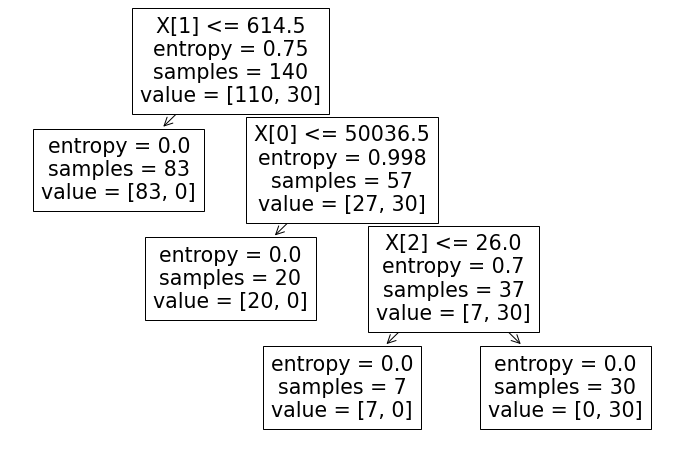

In [17]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dtree_entropy.fit(X_train, y_train))